In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification



from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('customer_churn_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Exploring Data

phone number column right off the bat can be dropped

In [5]:
# replace strings with binary to make it easier for models
df.replace(False, 0, inplace = True)
df.replace('no', 0, inplace = True)
df.replace(True, 1, inplace = True)
df.replace('yes', 1, inplace = True)

In [7]:
# calculate total charge
df['total charge'] = (df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge'])

In [8]:
df['total mins'] = (df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes'])

In [55]:
df['total calls'] = (df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls'])

In [10]:
df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charge,total mins,total calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,59.449754,591.864776,305.137114
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.502261,89.954251,34.448164
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,22.930000,284.300000,191.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,52.380000,531.500000,282.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,59.470000,593.600000,305.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,66.480000,652.400000,328.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,96.150000,885.000000,416.000000


based on this data it can be inferred there are no outliers in this data set

In [12]:
#get value counts for every column
for col in df.columns:
    print('Column Name:', col,'\n')
    print(df[col].value_counts())
    print('---------------------------------------------')
    print('\n')

Column Name: state 

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
NV     66
WA     66
CO     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
OK     61
DE     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
---------------------------------------------


Column Name: account length 

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64
---------------------------------------------


Column Name: area code 

415    1655
510     840
408     838
Name: area code, dtype: int64
---------------------------------------------


Column Name: phone n

# Data Transformations/EDA

check for distributions, use feature engineering if needed to determine which columns are needed 

In [14]:
# check balance of target data with percentages
df['churn'].value_counts(normalize=True)

0.0    0.855086
1.0    0.144914
Name: churn, dtype: float64

there is an imbalance (85% to 15%), will have to use class_weight = balanced when modeling

## Area Code

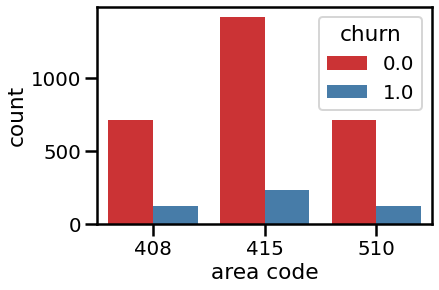

In [38]:
sns.countplot(x='area code', hue='churn', data=df, palette = "Set1");

no significance difference between classes based on area code so this can be dropped

## Account Length

Mean Account Length for Not Churn    : 3.36
Std Dev Account Length for Not Churn : 1.33
Mean Account Length for Churn        : 3.42
Std Dev Account Length for Churn     : 1.32


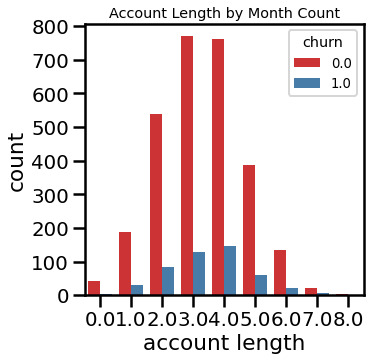

In [39]:
# change from day to month. 
Account_Lgth_Month = round(df['account length']/30)
# plot churn vs. not churn based on account length by month
plt.subplots(figsize = (5, 5))
sns.set_context('poster', font_scale = 0.6)
plt.title('Account Length by Month Count')
sns.countplot(x = Account_Lgth_Month, hue = 'churn', data = df, palette = 'Set1')

print('Mean Account Length for Not Churn    :', round((df[df['churn']==0]['account length']/30).mean(),2))
print('Std Dev Account Length for Not Churn :', round((df[df['churn']==0]['account length']/30).std(),2))
print('Mean Account Length for Churn        :', round((df[df['churn']==1]['account length']/30).mean(),2))
print('Std Dev Account Length for Churn     :', round((df[df['churn']==1]['account length']/30).std(),2))

both means and std deviations are similar so this doesnt have an effect on churn rate, can be dropped

## States

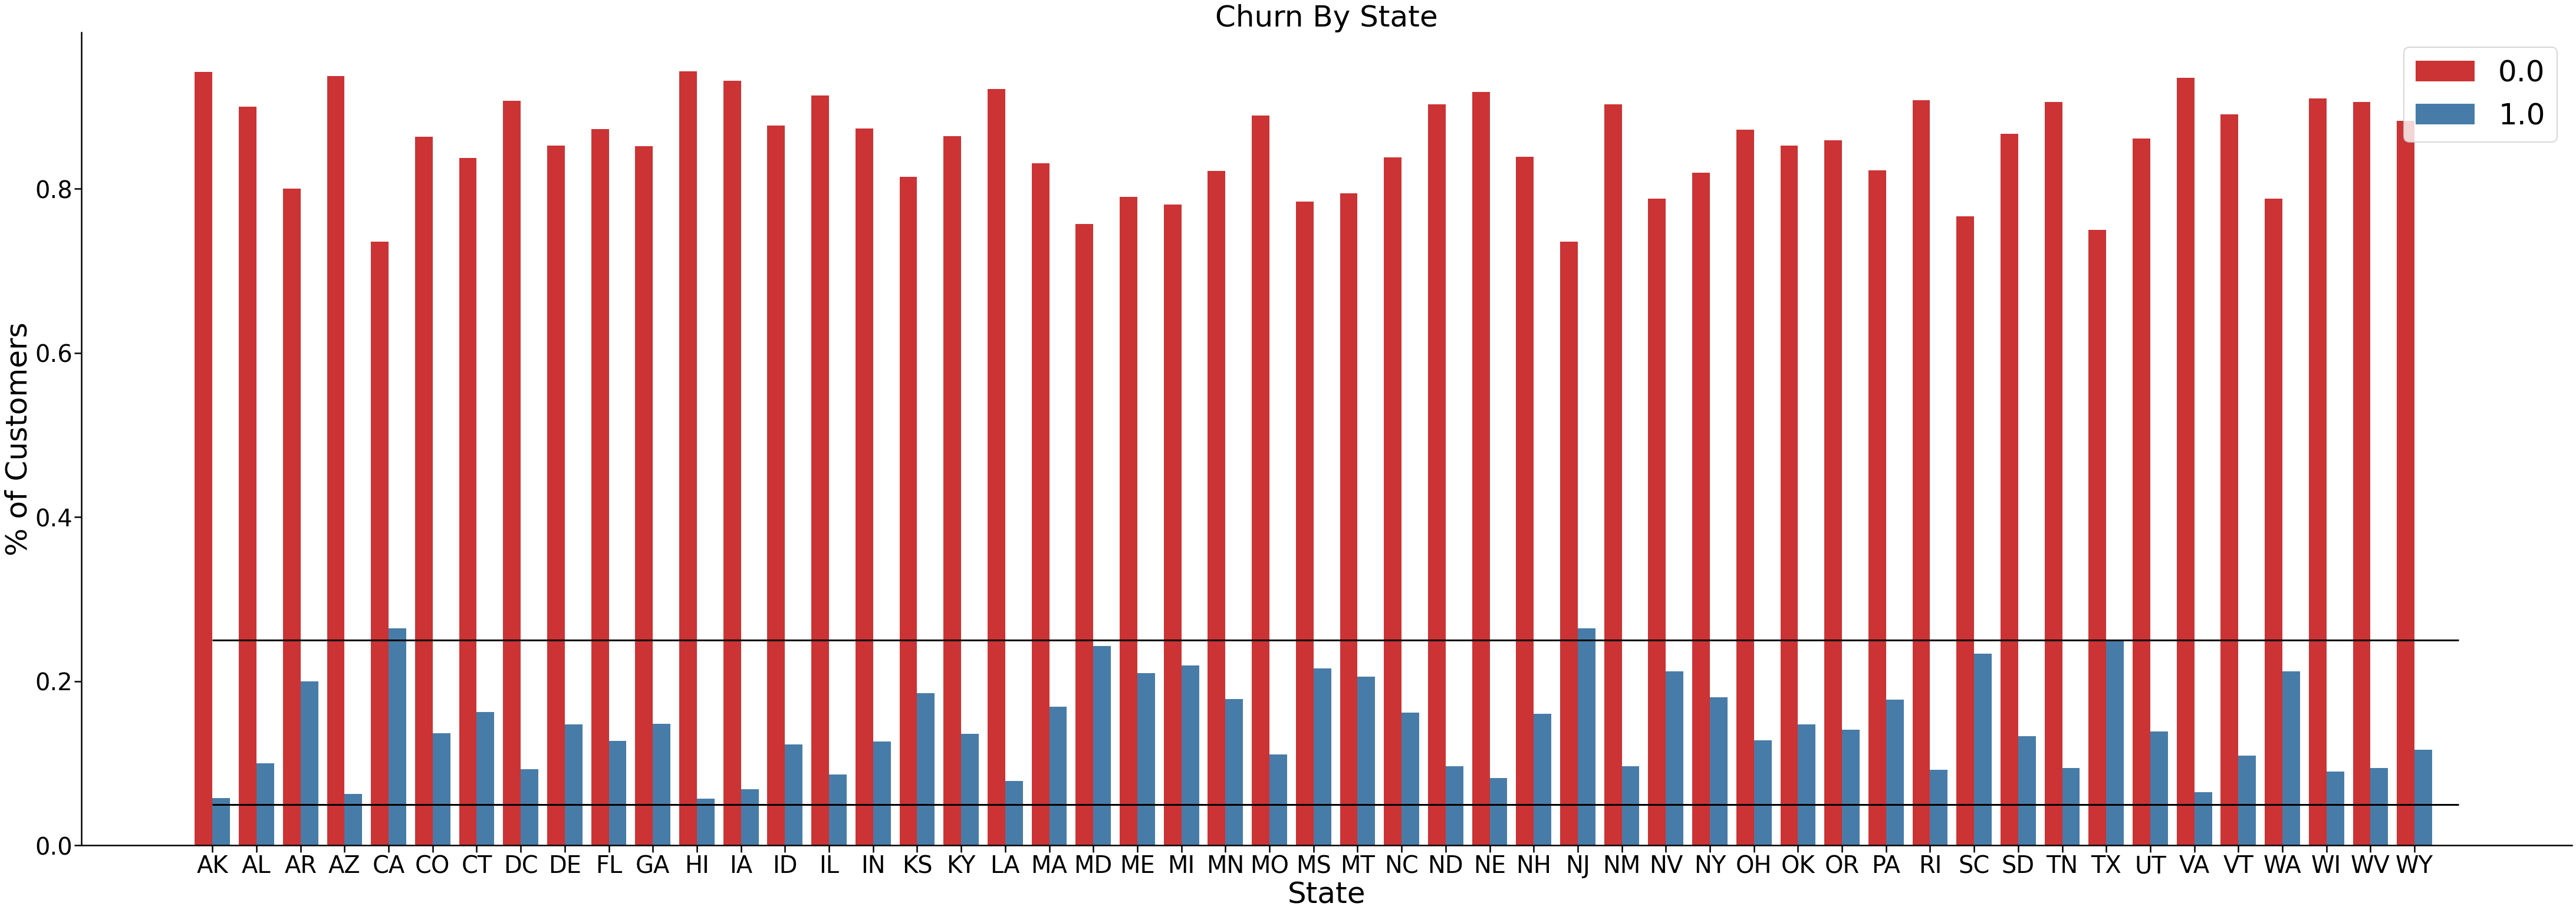

In [41]:
# churn rates group by states
State_Churn = df.groupby('state')['churn'].value_counts(normalize=True)
State_Churn = pd.DataFrame(State_Churn)
State_Churn.columns = ['Value']
State_Churn = State_Churn.reset_index()


sns.set_context('poster', font_scale = 0.6)
g = sns.catplot(data = State_Churn, kind = 'bar', x = 'state', y = 'Value', 
            hue = 'churn', palette = 'Set1', alpha=1, height=20, aspect=3)
plt.title('Churn By State', fontsize = 50)
plt.ylabel('% of Customers', fontsize = 50)
plt.xlabel('State', fontsize = 50)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40) 
plt.legend(fontsize = 50)
g._legend.remove()
plt.hlines(y = 0.25, xmin=0, xmax=51, color='black')
plt.hlines(y = 0.05, xmin=0, xmax=51, color='black');

CA, MD, NJ, TX have the highest churn rates. Alaska & Hawaii had the lowest churn rate. But there isn't a clear reason why certain states perform better than others, so possibly drop this as well. maybe group by regions

## Intl Plan

The # of customers with international plan: 323
The # of customers with no international plan: 3010


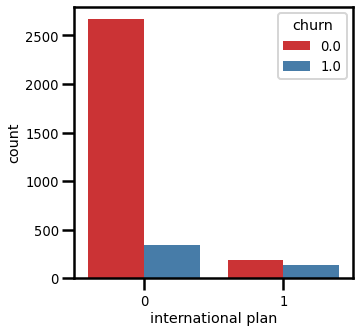

In [42]:
# number of customer with and without international plans
intl_plan = df[df['international plan'] == 1]
print('The # of customers with international plan:', len(intl_plan))
no_intl_plan = df[df['international plan'] == 0]
print('The # of customers with no international plan:', len(no_intl_plan))
sns.set_context('poster', font_scale = 0.6)
plt.subplots(figsize = (5, 5))
sns.countplot(x = 'international plan', hue = 'churn', data = df, palette = 'Set1');

In [30]:
# churn rates by international plan
Churn_By_Intl_Plan = df.groupby('international plan')['churn'].value_counts(normalize=True)
Churn_By_Intl_Plan = pd.DataFrame(Churn_By_Intl_Plan)
Churn_By_Intl_Plan.columns = ['value']
Churn_By_Intl_Plan = Churn_By_Intl_Plan.reset_index()
Churn_By_Intl_Plan

,international plan,churn,value
0,0,0.0,0.885050
1,0,1.0,0.114950
2,1,0.0,0.575851
3,1,1.0,0.424149


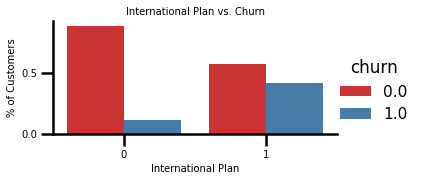

In [43]:
sns.set_context('poster', font_scale = 0.7)
sns.catplot(data = Churn_By_Intl_Plan, kind = 'bar', x = 'international plan', y = 'value', hue = 'churn', 
            palette = 'Set1', alpha=1, height=2.5, aspect=2)
plt.title('International Plan vs. Churn', fontsize = 10)
plt.ylabel('% of Customers', fontsize = 10)
plt.xlabel('International Plan', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show()

% of customers who churn is higher for people with an intl plan than those without ones, so maybe it is too expensive or not efficient for intl calls.


## Customer Service Calls

In [33]:
# get # of customer service calls
Customer_Service = df.groupby('customer service calls')['churn'].agg(['count'])
Customer_Service

,count
customer service calls,
0,697
1,1181
2,759
3,429
4,166
5,66
6,22
7,9
8,2


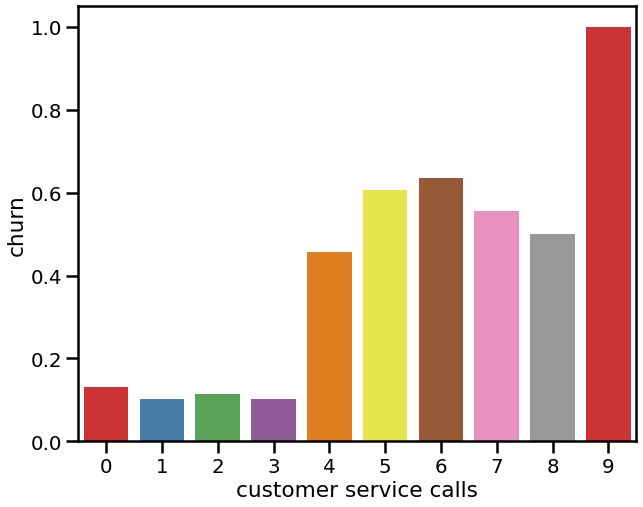

In [35]:
sns.set_context('poster', font_scale = 0.9)
plt.figure(figsize=(10, 8))
sns.barplot(x='customer service calls', y='churn', data=df, palette='Set1', ci=None);

When there are more customer service calls inc the tendency of churning goes up as well. It looks like once people hit 3 calls, thats when there was a significant rise of customer churn. So 3 calls should be considered as a warning thresold for the company

## Voicemail Plans

# of customers with voicemail plan: 922
# of customers with no voicemail plan: 2411


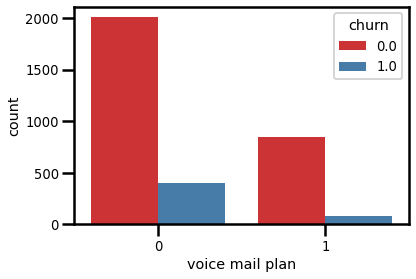

In [49]:
# with vs without voicemail plans customers
voicemail_plan = df[df['voice mail plan'] == 1]
print('# of customers with voicemail plan:', len(voicemail_plan))
no_voicemail_plan = df[df['voice mail plan'] == 0]
print('# of customers with no voicemail plan:', len(no_voicemail_plan))
sns.set_context('poster', font_scale = 0.6)
sns.countplot(x = 'voice mail plan', hue = 'churn', data = df, palette = 'Set1');

In [50]:
# churn rates by voicemail plan
Churn_By_Voicemail_Plan = df.groupby('voice mail plan')['churn'].value_counts(normalize=True)
Churn_By_Voicemail_Plan = pd.DataFrame(Churn_By_Voicemail_Plan)
Churn_By_Voicemail_Plan.columns = ['value']
Churn_By_Voicemail_Plan = Churn_By_Voicemail_Plan.reset_index()
Churn_By_Voicemail_Plan 

,voice mail plan,churn,value
0,0,0.0,0.832849
1,0,1.0,0.167151
2,1,0.0,0.913232
3,1,1.0,0.086768


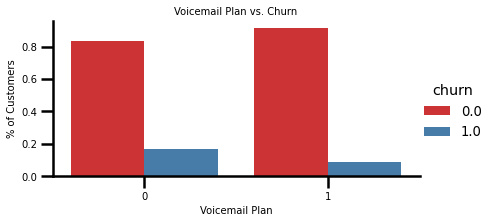

In [51]:
sns.set_context('poster', font_scale = 0.6)
sns.catplot(data = Churn_By_Voicemail_Plan, kind = 'bar', x = 'voice mail plan', y = 'value', 
            hue = 'churn', palette = 'Set1', alpha=1, height=3, aspect=2)
plt.title('Voicemail Plan vs. Churn', fontsize = 10)
plt.ylabel('% of Customers', fontsize = 10)
plt.xlabel('Voicemail Plan', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show()

% of customers who churned is larger for customers w/ voicemail plans than for ones w/o one.

In [52]:
# churn rates of # of voicemail messages
Churn_Vo_Qty = df.groupby('number vmail messages')['churn'].value_counts(normalize=True)
Churn_Vo_Qty = pd.DataFrame(Churn_Vo_Qty)
Churn_Vo_Qty.columns = ['value']
Churn_Vo_Qty = Churn_Vo_Qty.reset_index()

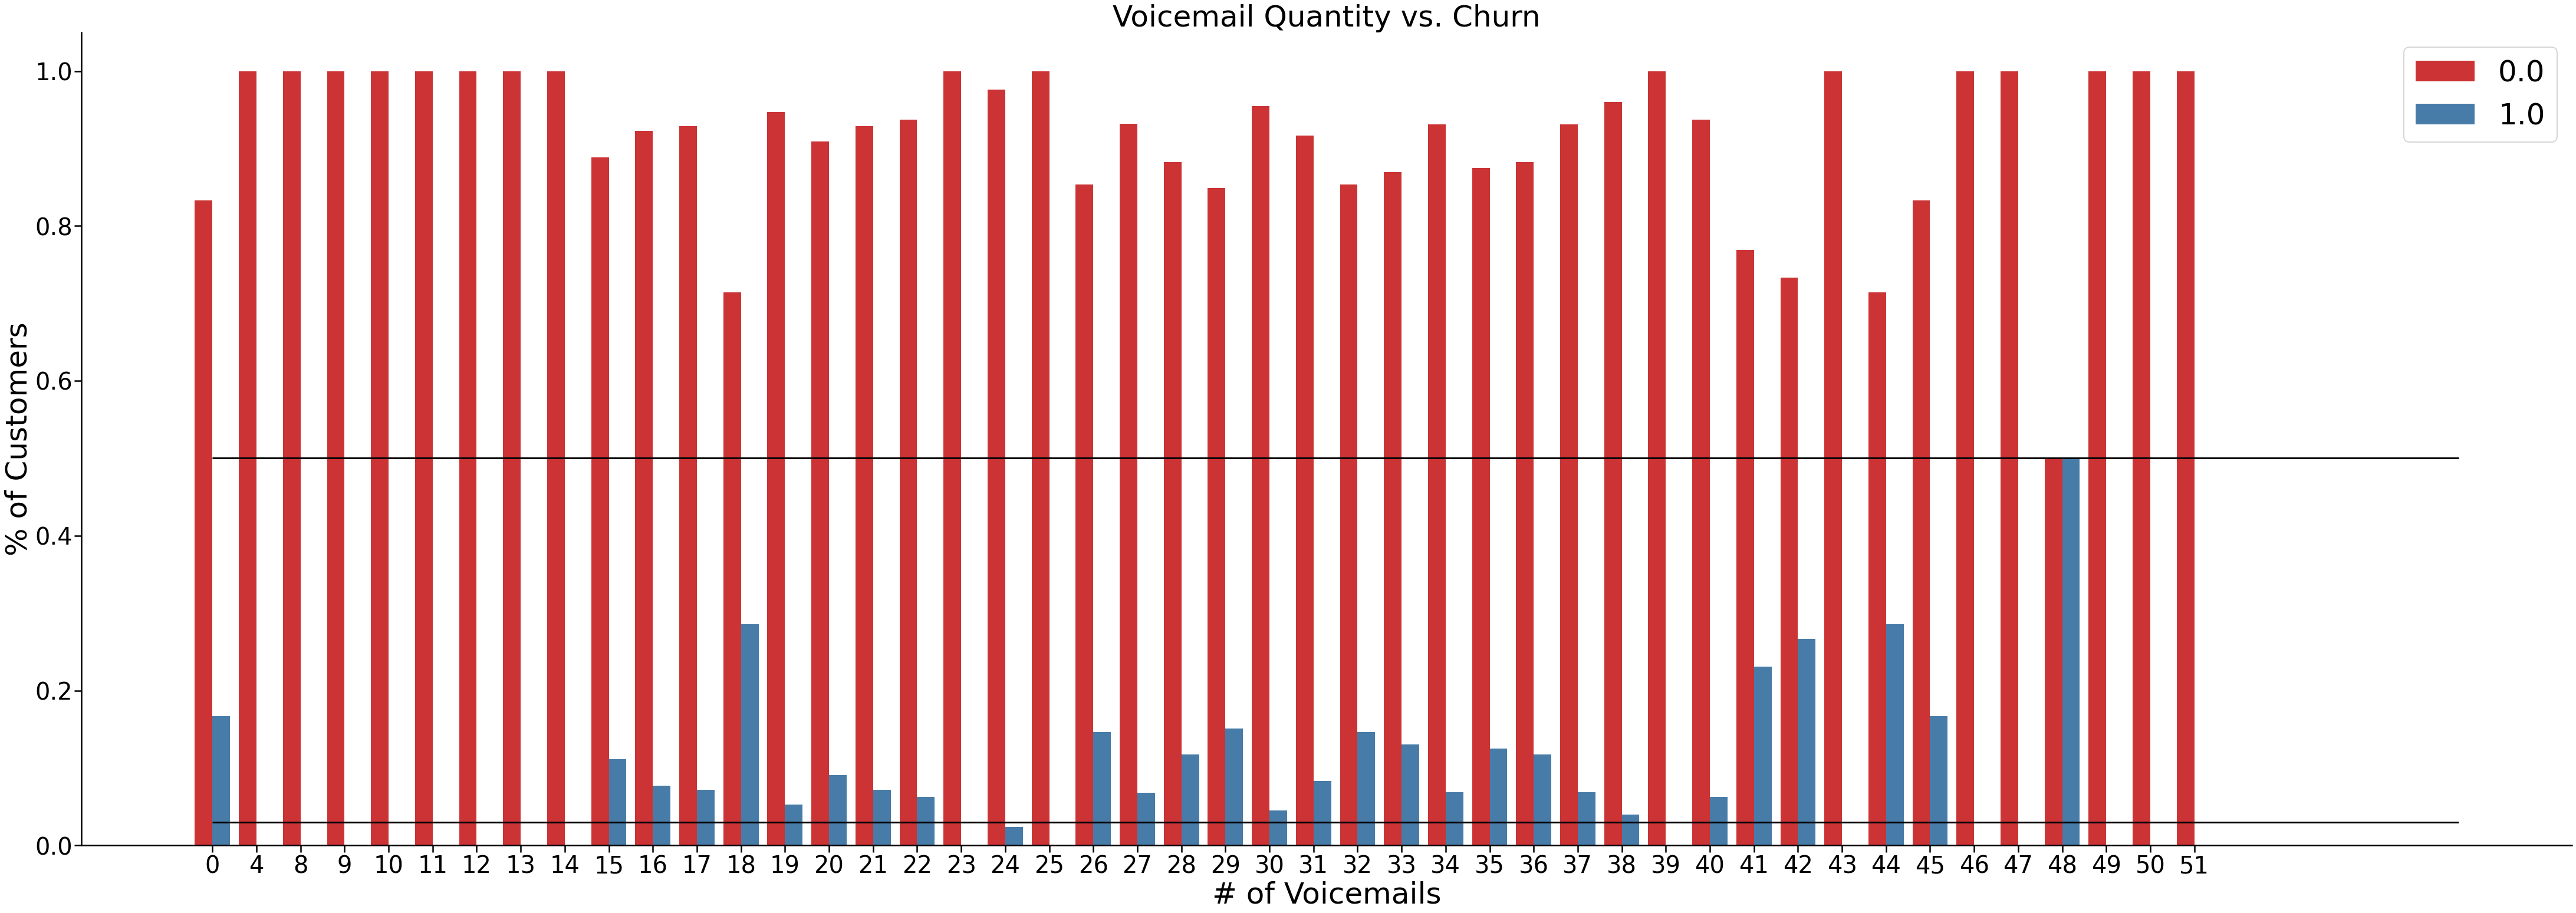

In [54]:
#do categorical plot
sns.set_context('poster', font_scale = 0.6)
g = sns.catplot(data = Churn_Vo_Qty, kind = 'bar', x = 'number vmail messages', y = 'value', 
            hue = 'churn', palette = 'Set1', alpha=1, height=20, aspect=3)
plt.title('Voicemail Quantity vs. Churn', fontsize = 50)
plt.ylabel('% of Customers', fontsize = 50)
plt.xlabel('# of Voicemails', fontsize = 50)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40) 
plt.legend(fontsize = 50)
g._legend.remove()
plt.hlines(y = 0.50, xmin=0, xmax=51, color='black')
plt.hlines(y = 0.03, xmin=0, xmax=51, color='black');

customers who get more voicemail messages tend to churn more than the others

# Call Totals

In [57]:
TCalls = df[['total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'total calls','churn']]
TCalls.head()

,total day calls,total eve calls,total night calls,total intl calls,total calls,churn
0,110,99,91,3,303,0.0
1,123,103,103,3,332,0.0
2,114,110,104,5,333,0.0
3,71,88,89,7,255,0.0
4,113,122,121,3,359,0.0


In [58]:
#get sum of churn (y or n) for each type of call
TCalls_Churn = TCalls.groupby('churn').sum().reset_index()
TCalls_Churn

,churn,total day calls,total eve calls,total night calls,total intl calls,total calls
0,0.0,285807,285110,285166,12919,869002
1,1.0,48945,48571,48493,2011,148020


In [59]:
r = TCalls_Churn['churn']
# Turn call values to percentages
Totals = TCalls_Churn['total calls']
Day = TCalls_Churn['total day calls'] / Totals
Eve = TCalls_Churn['total eve calls'] / Totals
Night = TCalls_Churn['total night calls'] / Totals
Intl = TCalls_Churn['total intl calls'] / Totals

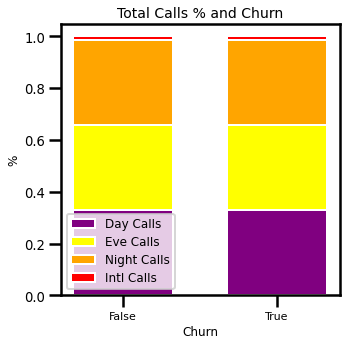

In [60]:
plt.figure(figsize=(5,5))
names = ('False', 'True')
barWidth = 0.65

# Day calls
plt.bar(r, Day, color='purple', edgecolor='white',
        width=barWidth, label='Day Calls')

# Eve calls
plt.bar(r, Eve, bottom=Day, color='yellow',
        edgecolor='white', width=barWidth, label='Eve Calls')

# Night calls
plt.bar(r, Night, bottom=[i+j for i,j in zip(Day, Eve)],
        color='orange', edgecolor='white', width=barWidth, label='Night Calls')

# Intl Calls
plt.bar(r, Intl, bottom=[i+j+k for i,j,k in zip(Day, Eve, Night)],
        color='red', edgecolor='white', width=barWidth, label='Intl Calls')

plt.xticks(r, names, fontsize=11)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('%', fontsize=12)
plt.title('Total Calls % and Churn', fontsize=14)
plt.legend(fontsize='small')
plt.show()

The timing of calls and intl calls has essentially no effect on customers who churned and those who didn't so these columns can also be dropped

## Rates

In [61]:
# rate/min by timing of day
Day_Rt = (df['total day charge'] / df['total day minutes']).median()
Eve_Rt = (df['total eve charge'] / df['total eve minutes']).median()
Night_Rt = (df['total night charge'] / df['total night minutes']).median()
Intl_Rt = (df['total intl charge'] / df['total intl minutes']).median()
print("Day Rate:", Day_Rt)
print("Eve Rate:", Eve_Rt)
print("Night Rate:", Night_Rt)
print("International Rate:", Intl_Rt)

Day Rate: 0.17000415454923143
Eve Rate: 0.085
Night Rate: 0.045
International Rate: 0.27


In [62]:
# calculate rates of making one international call, with and without international plan
Intl_Plan = df[df['international plan'] == 1]
No_Intl_Plan = df[df['international plan'] == 0]
Intl_Plan_Rate = (Intl_Plan['total intl charge'] / Intl_Plan['total intl minutes']).median()
Non_Intl_Plan_Rate = (No_Intl_Plan['total intl charge'] / No_Intl_Plan['total intl minutes']).median()
print("Int'l Plan Rate:", Intl_Plan_Rate)
print("No Int'l Plan Rate: ", Non_Intl_Plan_Rate)

Int'l Plan Rate: 0.27
No Int'l Plan Rate:  0.27


both are the same at 27 cents so it has no effect on price of rates, so you can drop this column

## Correlation Mapping

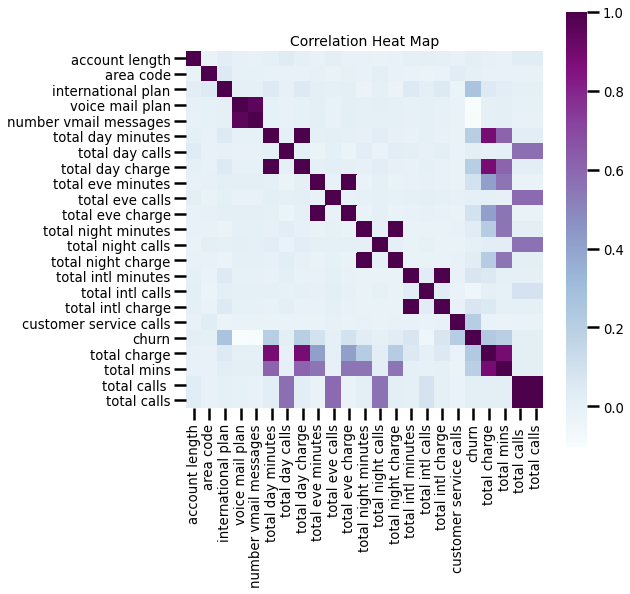

In [70]:
#make a correlation map
chucorr = df.corr()
plt.subplots(figsize=(8, 8))

sns.heatmap(chucorr, square=True, cmap="BuPu")
plt.title("Correlation Heat Map", fontsize=14)
plt.show()

drop columns where the churn had no relationship with them

In [72]:
df = df.drop(['area code','phone number', 'account length', 'total charge', 'total calls', 'total mins', 
          'total day charge','total eve charge', 'total night charge', 'total intl charge', 'state'], axis =1)

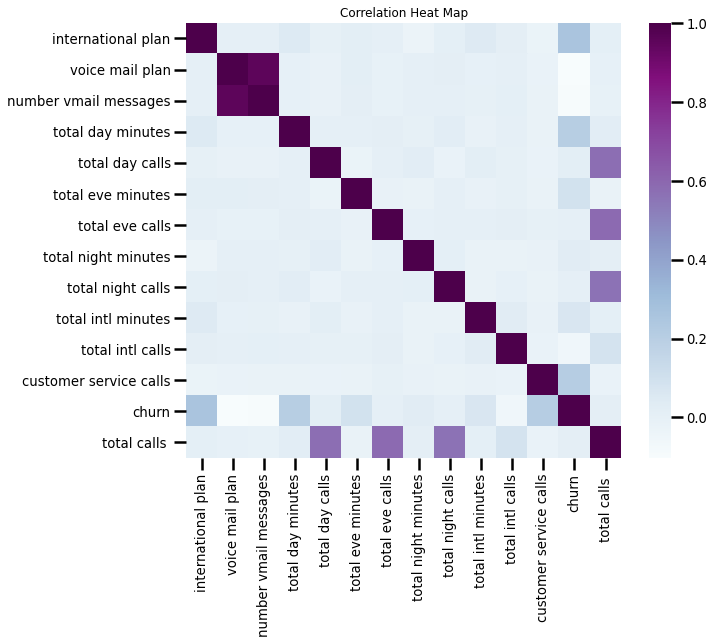

In [73]:
#correlation map after dropping some columns
chucorr = df.corr()
plt.subplots(figsize=(10, 8))

sns.heatmap(chucorr, square=True, cmap="BuPu")
plt.title("Correlation Heat Map", fontsize=12)
plt.show()

# Models

In [74]:
x = df.drop(['churn'], axis =1)
y = df.churn

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 420)

In [76]:
def model_predictions(model, x_train, x_test, y_train, y_test):
    '''Enter model name and test/train sets to generate predictions, precision, recall, accuracy, and F1 score'''
    model.fit(x_train, y_train)
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    print('Training Precision: ', precision_score(y_train, y_hat_train))
    print('Testing Precision: ', precision_score(y_test, y_hat_test))
    print('-----')

    print('Training Recall: ', recall_score(y_train, y_hat_train))
    print('Testing Recall: ', recall_score(y_test, y_hat_test))
    print('-----')

    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('-----')

    print('Training F1-Score: ', f1_score(y_train, y_hat_train))
    print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

In [77]:
def confusion_matrix(model, x_test, y_test):
    '''Plot confusion matrix with test set'''
    plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.cool)
    plt.show()

In [78]:
def plot_roc(model, x_train, x_test, y_train, y_test):
    '''Plot ROC for test set and train set with decision_function'''
    y_test_score = model.decision_function(x_test)
    y_train_score = model.decision_function(x_train)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score)

    plt.figure(figsize = (6, 6))
    plt.plot(train_fpr, train_tpr, color = 'purple', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'red', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'black', linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xticks(rotation = 90)
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

In [80]:
def plot_roc_proba(model, X_train, X_test, y_train, y_test):
    '''Plot ROC for test set and train set with predict_proba'''
    y_test_score = model.predict_proba(x_test_scaled)
    y_train_score = model.predict_proba(x_train_scaled)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score[:,1])
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score[:,1])

    plt.figure(figsize = (6, 6))
    plt.plot(train_fpr, train_tpr, color = 'purple', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'red', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'black', linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xticks(rotation = 90)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

Model 1(Unbalanced)

In [81]:
logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=False, intercept_scaling=1, 
                            class_weight=None, random_state=420, solver='liblinear', max_iter=100, multi_class='auto', 
                            verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [82]:
model_predictions(logreg, x_train, x_test, y_train, y_test)

Training Precision:  0.5114503816793893
Testing Precision:  0.4411764705882353
-----
Training Recall:  0.17091836734693877
Testing Recall:  0.16483516483516483
-----
Training Accuracy:  0.8540885221305327
Testing Accuracy:  0.8575712143928036
-----
Training F1-Score:  0.25621414913957935
Testing F1-Score:  0.24


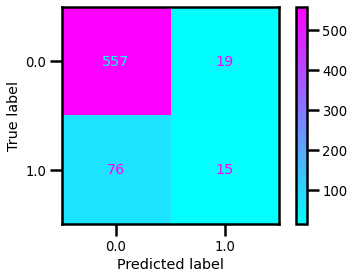

In [83]:
confusion_matrix(logreg, x_test, y_test)

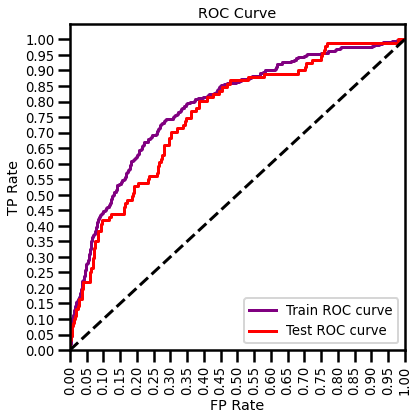

Train AUC: 0.7856021036382891
Test AUC: 0.7555135836385836


In [84]:
plot_roc(logreg, x_train, x_test, y_train, y_test)

Model 2 (Balanced)

In [85]:
# Instantiate the model, change class_weight to balanced
logreg_balanced = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=False, intercept_scaling=1, 
                            class_weight='balanced', random_state=420, solver='liblinear', max_iter=100, multi_class='auto', 
                            verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [86]:
model_predictions(logreg_balanced, x_train, x_test, y_train, y_test)

Training Precision:  0.34032634032634035
Testing Precision:  0.29064039408866993
-----
Training Recall:  0.7448979591836735
Testing Recall:  0.6483516483516484
-----
Training Accuracy:  0.7501875468867217
Testing Accuracy:  0.7361319340329835
-----
Training F1-Score:  0.4672
Testing F1-Score:  0.4013605442176871


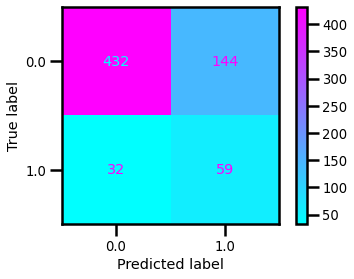

In [87]:
confusion_matrix(logreg_balanced, x_test, y_test)

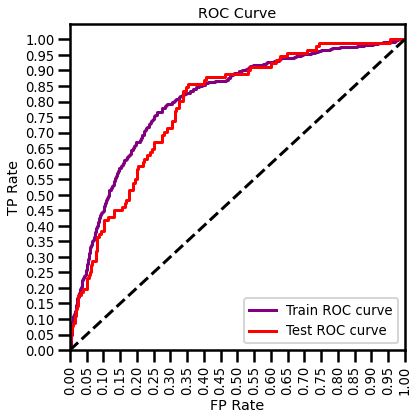

Train AUC: 0.8062110728196292
Test AUC: 0.7856379731379731


In [88]:
plot_roc(logreg_balanced, x_train, x_test, y_train, y_test)

Accurary scores decreased while F1 scores increased

# K-Nearest Neighbor

In [89]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

In [90]:
model_predictions(knn, x_train_scaled, x_test_scaled, y_train, y_test)

Training Precision:  0.9170305676855895
Testing Precision:  0.775
-----
Training Recall:  0.5357142857142857
Testing Recall:  0.34065934065934067
-----
Training Accuracy:  0.9246061515378845
Testing Accuracy:  0.896551724137931
-----
Training F1-Score:  0.6763285024154589
Testing F1-Score:  0.4732824427480916


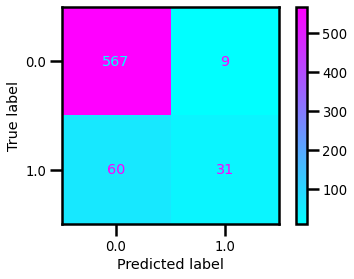

In [91]:
confusion_matrix(knn, x_test_scaled, y_test)

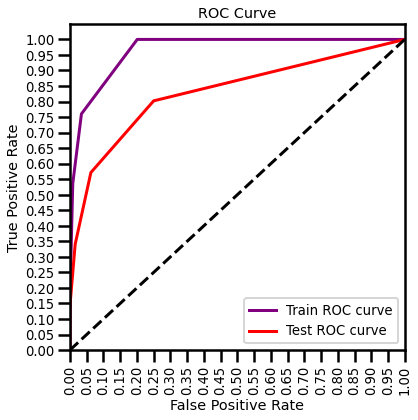

Train AUC: 0.9654103395975805
Test AUC: 0.8297561813186813


In [92]:
plot_roc_proba(knn, x_train_scaled, x_test_scaled, y_train, y_test)

## Model 2

In [93]:
def find_best_k(x_train_scaled, y_train, x_test_scaled, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_scaled, y_train)
        train_score = knn.score(x_train_scaled, y_train)
        test_score = knn.score(x_test_scaled, y_test)
        if test_score > best_score:
            best_k = k
            best_score = test_score
    
    print("Best Value for k: {}".format(best_k))
    
find_best_k(x_train_scaled, y_train, x_test_scaled, y_test)

Best Value for k: 5


In [94]:
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [95]:
model_predictions(knn_3, x_train_scaled, x_test_scaled, y_train, y_test)

Training Precision:  0.9242424242424242
Testing Precision:  0.7380952380952381
-----
Training Recall:  0.6224489795918368
Testing Recall:  0.34065934065934067
-----
Training Accuracy:  0.9369842460615154
Testing Accuracy:  0.8935532233883059
-----
Training F1-Score:  0.7439024390243902
Testing F1-Score:  0.46616541353383456


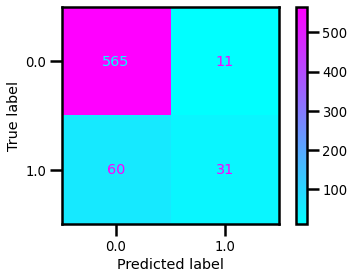

In [96]:
confusion_matrix(knn_3, x_test_scaled, y_test)

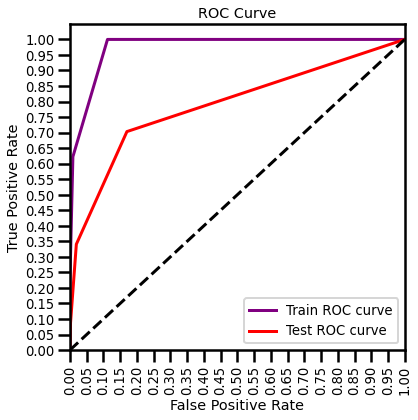

Train AUC: 0.9754321253567391
Test AUC: 0.7893868284493286


In [97]:
plot_roc_proba(knn_3, x_train_scaled, x_test_scaled, y_train, y_test)

- Accuracy scores stayed relatively the same
- F1 scores are still pretty low
- Overfitted